In [2]:
#historical forcings
import numpy as np
import matplotlib.pyplot as plt
hist_atmos = np.load('data/atmos_forcings.npy')

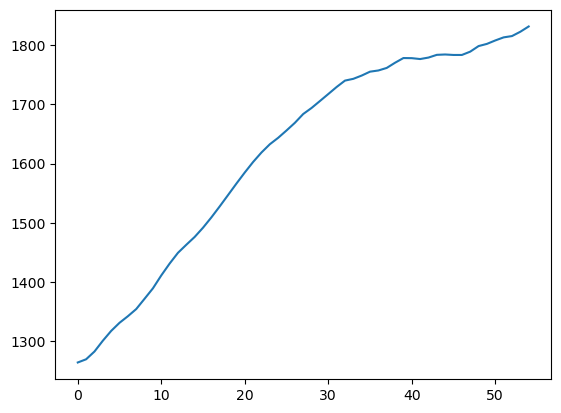

In [4]:
plt.plot(hist_atmos[0])

In [3]:
import pandas as pd 
forcings_path = '..'
ssp245_forcings = [f'{forcings_path}/ssp585/CH4_CMIP6_2015_2500.txt',
                  f'{forcings_path}/ssp585/CFC11eq_CMIP6_2015_2500.txt',
                  f'{forcings_path}/ssp585/CFC12eq_CMIP6_2015_2500.txt',
                  f'{forcings_path}/ssp585/CO2_CMIP6_2015_2500.txt']
# methane_forcings = pd.read_csv(f'{forcings_path}/CH4_CMIP6_0000_2014.txt',delimiter='\t')
# cfc11_forcings = pd.read_csv(f'{forcings_path}/CFC11eq_CMIP6_0000_2014.txt',delimiter='\t')
# cfc12_forcings = pd.read_csv(f'{forcings_path}/CFC12eq_CMIP6_0000_2014.txt',delimiter='\t')
# co2_forcings = pd.read_csv(f'{forcings_path}/CO2_CMIP6_0000_2014.txt',delimiter='\t')

# methane_forcings.columns=['year','data']
agg_atmos_forcings = []
for file in ssp245_forcings:
    forcings = pd.read_csv(file,delimiter='\t',header=None)
    forcings.columns=['year','data']
    print(forcings)
    start_year = 2015
    end_year = 2500
    blank=np.ndarray((end_year - start_year))
    print(forcings.iloc[0])
    for i in range(start_year,end_year):
        #need i-1 in selector because indexing is off by one in the pandas
        print(i)
        print(forcings.iloc[i-start_year])
        blank[i-start_year]= forcings.iloc[i-start_year]['data']
    agg_atmos_forcings.append(blank)
stacked = np.stack(agg_atmos_forcings)
# np.save('atmos_forcings',np.stack(agg_atmos_forcings))

            year    data
0    Annee_2015=  1841.9
1    Annee_2016=  1851.6
2    Annee_2017=  1873.5
3    Annee_2018=  1886.0
4    Annee_2019=  1897.1
..           ...     ...
481  Annee_2496=  1019.6
482  Annee_2497=  1019.4
483  Annee_2498=  1019.3
484  Annee_2499=  1019.1
485  Annee_2500=  1019.0

[486 rows x 2 columns]
year    Annee_2015=
data         1841.9
Name: 0, dtype: object
2015
year    Annee_2015=
data         1841.9
Name: 0, dtype: object
2016
year    Annee_2016=
data         1851.6
Name: 1, dtype: object
2017
year    Annee_2017=
data         1873.5
Name: 2, dtype: object
2018
year    Annee_2018=
data         1886.0
Name: 3, dtype: object
2019
year    Annee_2019=
data         1897.1
Name: 4, dtype: object
2020
year    Annee_2020=
data         1906.9
Name: 5, dtype: object
2021
year    Annee_2021=
data         1915.5
Name: 6, dtype: object
2022
year    Annee_2022=
data         1924.0
Name: 7, dtype: object
2023
year    Annee_2023=
data         1933.4
Name: 8, dtype: object
2

In [4]:
concated_atmos = []
for i in range(4):
    concated_atmos.append(np.concatenate([hist_atmos[i],stacked[i]]))
final_atmos = np.stack(concated_atmos)

In [5]:
np.save('data/ssp_585_full_atmos.npy',final_atmos)

In [37]:
import glob
solar_files = glob.glob('/Users/gclyne/ipsl_dcpp/future_solar/solarforcing_v3.1_daily_6bands_*.nc')

In [38]:
import xarray as xr
solar_data = []
for file in solar_files:
    solar = xr.open_dataset(file)
    solar = solar.groupby('time.month').mean()['ssi'].data
    solar_data.append(solar)
import numpy as np
solar_data = np.stack(solar_data)

/Users/gclyne/miniforge3/envs/env_dcpp/lib/python3.12/site-packages/xarray/coding/times.py:995: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/gclyne/miniforge3/envs/env_dcpp/lib/python3.12/site-packages/xarray/coding/times.py:995: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/gclyne/miniforge3/envs/env_dcpp/lib/python3.12/site-packages/xarray/core/indexing.py:630: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Users/gclyne/miniforge3/envs/env_dcpp/l

In [39]:
hist_solar = np.load('data/solar_forcings.npy')

In [43]:
full_solar = np.concatenate([hist_solar,solar_data])

In [44]:
np.save('data/full_solar.npy',full_solar)